In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow
from tensorflow.keras.datasets import mnist


In [2]:
import random
def add_noise(image,scale) : 
    noise = np.random.normal(0, scale , image.shape) 
    noisy_image = image + noise
    return noisy_image 

def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_imgs(x_test, decoded_imgs=None, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        if decoded_imgs is not None:
            ax = plt.subplot(2, n, i+ 1 +n)
            plt.imshow(decoded_imgs[i].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()



In [4]:
(trainX, trainy), (testX, testy) = mnist.load_data()

train_original = [image/255 for image in trainX]
test_original = [image/255 for image in testX]
 

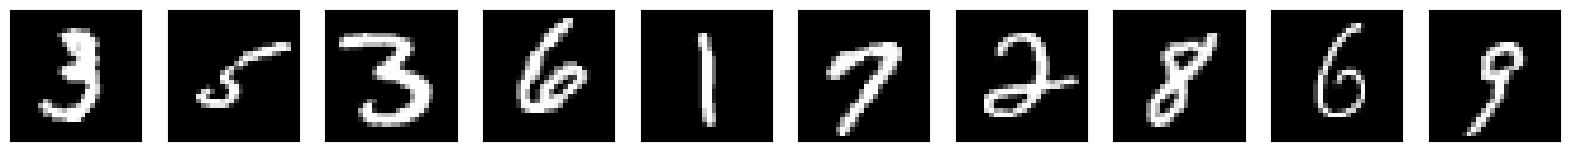

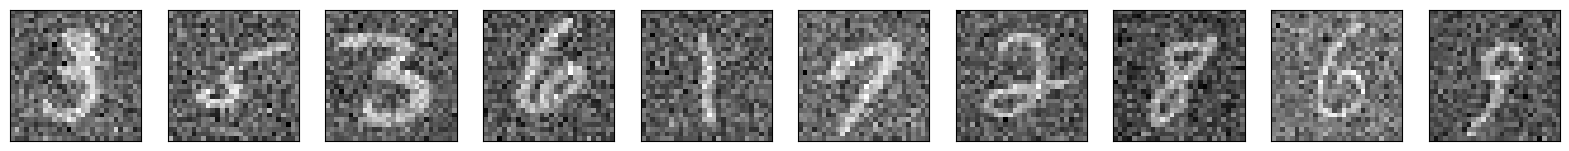

In [11]:
show_imgs(trainX[10:20])

test_noise = [ add_noise(image/255 , 0.3) for image in trainX[10:20]]

show_imgs(test_noise)



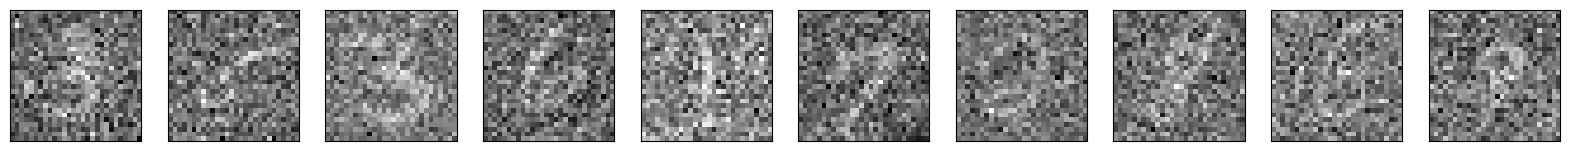

In [12]:
scale = 0.7
train_noisy = [add_noise(image/255,scale) for image in trainX]
test_noisy = [add_noise(image/255,scale) for image in testX]
 
show_imgs(train_noisy[10:20])

In [13]:

train_original = np.reshape(train_original, (60000, 28, 28, 1))
test_original = np.reshape(test_original, (10000, 28, 28, 1))
 
train_noisy = np.reshape(train_noisy, (60000, 28, 28, 1))
test_noisy = np.reshape(test_noisy, (10000, 28, 28, 1))


In [14]:

input_data = tensorflow.keras.layers.Input(shape=(28, 28, 1))
#Encoder part
encoder = tensorflow.keras.layers.Conv2D(64, (5,5), activation='relu')(input_data)
encoder = tensorflow.keras.layers.MaxPooling2D((2,2))(encoder)
 
encoder = tensorflow.keras.layers.Conv2D(128, (3,3), activation='relu')(encoder)
encoder = tensorflow.keras.layers.MaxPooling2D((2,2))(encoder)
 
encoder = tensorflow.keras.layers.Conv2D(256, (3,3), activation='relu')(encoder)
encoder = tensorflow.keras.layers.MaxPooling2D((2,2))(encoder)
 
#Decoder Part
decoder = tensorflow.keras.layers.Conv2DTranspose(256, (3,3), activation='relu')(encoder)
 
decoder = tensorflow.keras.layers.Conv2DTranspose(128, (3,3), activation='relu')(decoder)
decoder = tensorflow.keras.layers.UpSampling2D((2,2))(decoder)
 
decoder = tensorflow.keras.layers.Conv2DTranspose(64, (3,3), activation='relu')(decoder)
decoder = tensorflow.keras.layers.UpSampling2D((2,2))(decoder)
 
decoded = tensorflow.keras.layers.Conv2DTranspose(1, (5,5), activation='relu')(decoder)

autoencoder = tensorflow.keras.models.Model(inputs=input_data, outputs=decoded)


noise level : 1    scale = 0.1 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 256)         2951

1/1 [==============================] - 0s 17ms/step


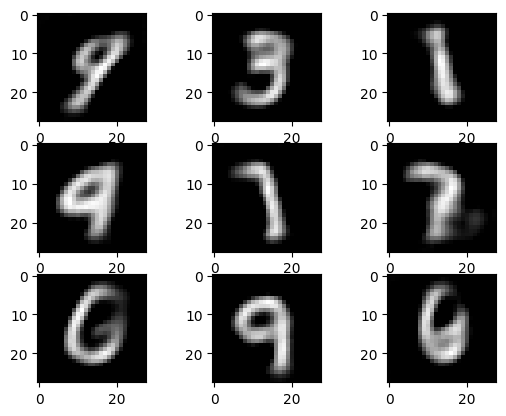

Noisy test images


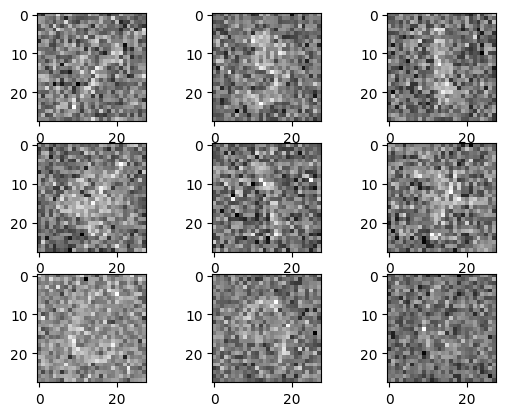

In [15]:
autoencoder.compile(loss='mse', optimizer='adam' , metrics=['accuracy'])
autoencoder.summary()
autoencoder.fit(train_noisy, train_original, epochs=1, batch_size=255, validation_data=(test_noisy, test_original))
offset=92

for i in range(9):
    plt.subplot(330 + 1 + i)
    output = autoencoder.predict(np.array([test_noisy[i+offset]]))
    op_image = np.reshape(output[0]*255, (28, 28))
    plt.imshow(op_image, cmap='gray')
plt.show()

print("Noisy test images")
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(test_noisy[i+offset,:,:, -1], cmap='gray')
plt.show()



noise level : 2  scale : 0.5

236/236 [==============================] - 106s 443ms/step - loss: 0.0388 - accuracy: 0.8042 - val_loss: 0.0215 - val_accuracy: 0.8088
Noisy test images


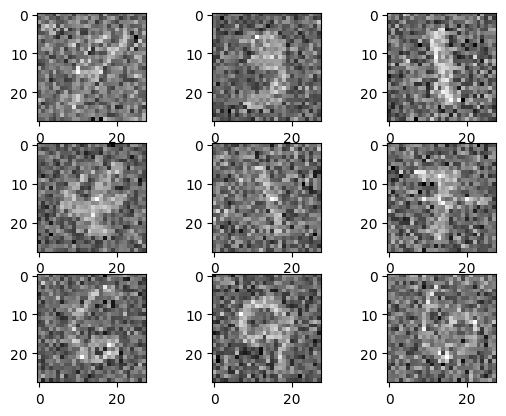

1/1 [==============================] - 0s 23ms/step


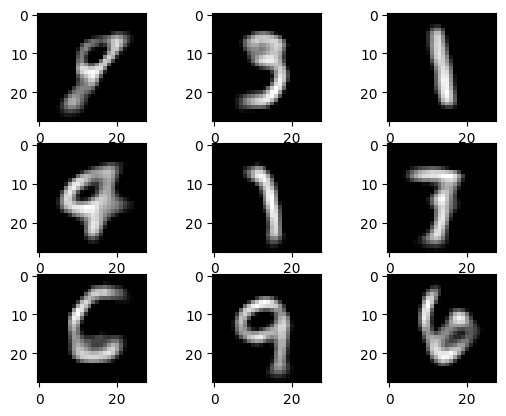

In [8]:
autoencoder.compile(loss='mse', optimizer='adam' , metrics=['accuracy'])
autoencoder.fit(train_noisy, train_original, epochs=1, batch_size=255, validation_data=(test_noisy, test_original))
offset=92

print("Noisy test images")
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(test_noisy[i+offset,:,:, -1], cmap='gray')
plt.show()

for i in range(9):
    plt.subplot(330 + 1 + i)
    output = autoencoder.predict(np.array([test_noisy[i+offset]]))
    op_image = np.reshape(output[0]*255, (28, 28))
    plt.imshow(op_image, cmap='gray')
plt.show()


noise level : 3   scale : 0.7

236/236 [==============================] - 165s 696ms/step - loss: 0.0263 - accuracy: 0.8077 - val_loss: 0.0223 - val_accuracy: 0.8075
Noisy test images


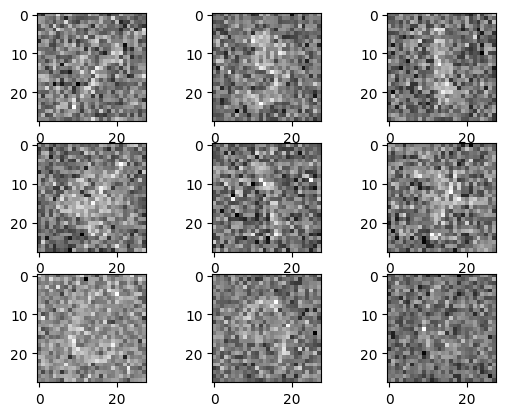

1/1 [==============================] - 0s 32ms/step


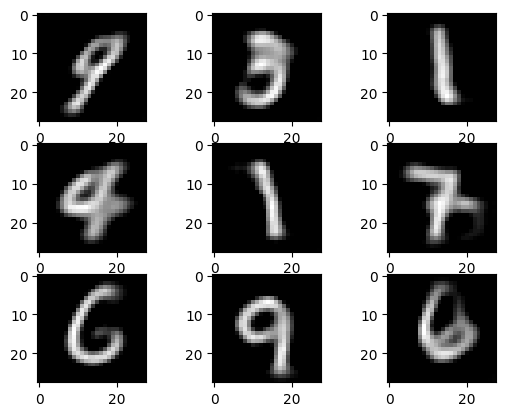

In [16]:
autoencoder.compile(loss='mse', optimizer='adam' , metrics=['accuracy'])
autoencoder.fit(train_noisy, train_original, epochs=1, batch_size=255, validation_data=(test_noisy, test_original))
offset=92

print("Noisy test images")
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(test_noisy[i+offset,:,:, -1], cmap='gray')
plt.show()

for i in range(9):
    plt.subplot(330 + 1 + i)
    output = autoencoder.predict(np.array([test_noisy[i+offset]]))
    op_image = np.reshape(output[0]*255, (28, 28))
    plt.imshow(op_image, cmap='gray')
plt.show()


In [ ]:
scale = [0.1 , 0.5 , 0.7]
accuracy = [0.81 ,0.8088 ,0.8078]